In [840]:
import numpy as np
import pandas as pd
import math
import re

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from scipy import stats

# 1. Знакомство с данными, обработка пропусков, дубликатов

In [841]:
df = pd.read_csv('data/data.csv.zip')
original_df = df.copy()
df

,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,mls-id,PrivatePool,MlsId,target
0,Active,NaN,Single Family Home,240 Heather Ln,3.5,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Gas Logs,Southern Pines,"[{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...",2900,28387,4,NC,NaN,NaN,NaN,611019,"$418,000"
1,for sale,NaN,single-family home,12911 E Heroy Ave,3 Baths,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",NaN,Spokane Valley,"[{'rating': ['4/10', 'None/10', '4/10'], 'data...","1,947 sqft",99216,3 Beds,WA,2.0,NaN,NaN,201916904,"$310,000"
2,for sale,NaN,single-family home,2005 Westridge Rd,2 Baths,"{'atAGlanceFacts': [{'factValue': '1961', 'fac...",yes,Los Angeles,"[{'rating': ['8/10', '4/10', '8/10'], 'data': ...","3,000 sqft",90049,3 Beds,CA,1.0,NaN,yes,FR19221027,"$2,895,000"
3,for sale,NaN,single-family home,4311 Livingston Ave,8 Baths,"{'atAGlanceFacts': [{'factValue': '2006', 'fac...",yes,Dallas,"[{'rating': ['9/10', '9/10', '10/10', '9/10'],...","6,457 sqft",75205,5 Beds,TX,3.0,NaN,NaN,14191809,"$2,395,000"
4,for sale,NaN,lot/land,1524 Kiscoe St,NaN,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",NaN,Palm Bay,"[{'rating': ['4/10', '5/10', '5/10'], 'data': ...",NaN,32908,NaN,FL,NaN,NaN,NaN,861745,"$5,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377180,NaN,NaN,Single Family,20800 NE 23rd Ave,6.0,"{'atAGlanceFacts': [{'factValue': '1990', 'fac...",NaN,Miami,"[{'rating': ['10/10', '5/10'], 'data': {'Dista...","4,017",33180,5,FL,0.0,NaN,Yes,A10702700,"$1,249,000"
377181,for sale,NaN,condo,3530 N Lake Shore Dr #4B,3 Baths,"{'atAGlanceFacts': [{'factValue': '1924', 'fac...",NaN,Chicago,"[{'rating': ['1/10', '5/10', '7/10'], 'data': ...","2,000 sqft",60657,3 Beds,IL,9.0,NaN,NaN,10374233,"$674,999"
377182,for sale,NaN,single-family home,15509 Linden Blvd,3 Baths,"{'atAGlanceFacts': [{'factValue': '1950', 'fac...",NaN,Jamaica,"[{'rating': ['5/10', '4/10'], 'data': {'Distan...","1,152 sqft",11434,3 Beds,NY,2,NaN,NaN,NaN,"$528,000"
377183,NaN,NaN,NaN,7810 Pereida St,NaN,"{'atAGlanceFacts': [{'factValue': None, 'factL...",NaN,Houston,"[{'rating': ['NA', 'NA', 'NA'], 'data': {'Dist...",NaN,77028,"8,479 sqft",TX,NaN,NaN,NaN,NaN,"$34,500"


In [842]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377185 entries, 0 to 377184
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   status        337267 non-null  object
 1   private pool  4181 non-null    object
 2   propertyType  342452 non-null  object
 3   street        377183 non-null  object
 4   baths         270847 non-null  object
 5   homeFacts     377185 non-null  object
 6   fireplace     103114 non-null  object
 7   city          377151 non-null  object
 8   schools       377185 non-null  object
 9   sqft          336608 non-null  object
 10  zipcode       377185 non-null  object
 11  beds          285903 non-null  object
 12  state         377185 non-null  object
 13  stories       226469 non-null  object
 14  mls-id        24942 non-null   object
 15  PrivatePool   40311 non-null   object
 16  MlsId         310305 non-null  object
 17  target        374704 non-null  object
dtypes: object(18)
memory usa

In [843]:
df.describe()

,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,mls-id,PrivatePool,MlsId,target
count,337267,4181,342452,377183,270847,377185,103114,377151,377185,336608,377185,285903,377185,226469,24942,40311,310305,374704
unique,159,1,1280,337076,229,321009,1652,2026,297365,25405,4549,1184,39,347,24907,2,232944,43939
top,for sale,Yes,single-family home,Address Not Disclosed,2 Baths,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",yes,Houston,"[{'rating': [], 'data': {'Distance': [], 'Grad...",0,32137,3 Beds,FL,1.0,No MLS#,yes,NO MLS,"$225,000"
freq,156104,4181,92206,672,52466,7174,50356,24442,4204,11854,2141,53459,115449,67454,3,28793,24,1462


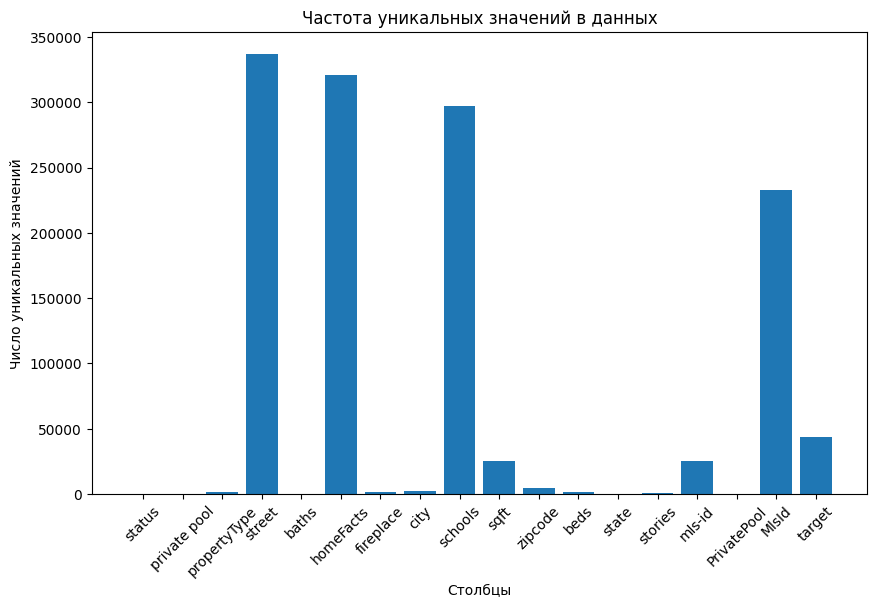

In [844]:
unique_value_counts = []

for col in df.columns:
    # Подсчет количества уникальных значений в каждом столбце и добавление их в список
    unique_value_counts.append(len(df[col].unique()))

# Создание столбчатой диаграммы
plt.figure(figsize=(10, 6))
plt.bar(df.columns, unique_value_counts)
plt.xlabel('Столбцы')
plt.ylabel('Число уникальных значений')
plt.title('Частота уникальных значений в данных')
plt.xticks(rotation=45)
plt.show()

Выводы:
* только столбцы `homeFacts`, `schools`, `zipcode`, `state` не содержат пропущенных значений
* целевой столбец `target` содержит 2481 пропущенных значений, строки с которыми будут удалены
* есть служебные столбцы `mls-id` и `MlsId` - идентификаторы домов в системе MLS - которые не несут никакой информации для обучения. Они будут удалены.
* стоблцы `private pool` и `PrivatePool` содержат информацию от бассейнах - из них оставим только один
* стоблцы `homeFacts` и `schools` представлены в виде сериализованных словарей - из ним попробуем извлечь информации в виде отдельных столбцов

In [845]:
# Проверка служебных столбцов
mask = (~df['MlsId'].isna()) & (~df['mls-id'].isna())
print(f'Количество строк, содержащих значения в обоих служебных столбцах: {df[mask].shape[0]}')

# Похоже, датафрейм содержит данные из нескольких источников, которые содержали разные имена ID домов в системе MLS.
# Удаляем служебные столбцы:
drop_columns = ['MlsId', 'mls-id']
df = df.drop(drop_columns, axis=1)
print(f'Размерность данных после удаления служебных столбцов: {df.shape}')


Количество строк, содержащих значения в обоих служебных столбцах: 0
Размерность данных после удаления служебных столбцов: (377185, 16)


In [846]:
# Проверка информации о частных бассейнах
mask = (~df['PrivatePool'].isna()) & (~df['private pool'].isna())
print(f'Количество строк, содержащих значения в обоих столбцах о бассеинах: {df[mask].shape[0]}')

# Сохраним информацию о бассейнах из меньшего столбца `private pool` и удалим его
df['PrivatePool'].fillna(df['private pool'], inplace=True)
df.drop(columns=['private pool'], inplace=True)
print(f'Размерность данных после удаления `private pool`: {df.shape}')
print(f'Уникальные значения столбца `PrivatePool` после слияния: {df.PrivatePool.unique()}')

# Похоже, пропущенные  значения в PrivatePool указывают на отсутствие бассейна, поэтому преобразуем этот столбец в числовой:
# 1 - есть бассейн
# 0 - нет бассейна
df['PrivatePool'].replace({'yes': 1, 'Yes': 1}, inplace=True)
df['PrivatePool'].fillna(0, inplace=True)
df['PrivatePool'] = df['PrivatePool'].astype(np.int64)


Количество строк, содержащих значения в обоих столбцах о бассеинах: 0
Размерность данных после удаления `private pool`: (377185, 15)
Уникальные значения столбца `PrivatePool` после слияния: [nan 'yes' 'Yes']


In [847]:
# Преобразуем целевой признак в числовой и удалим пропуски

print(f'Процент пропусков целевого признака: {df[df.target.isna()].shape[0] / df.shape[0] * 100:.2f}%')

# Поскольку пропусков в целевом признаке меньше 1%, просто удалим эти строки
df.dropna(subset=['target'], inplace=True)

# Удалим символы денежного формата
df['target'] = df['target'].replace('[\$,\+]', '', regex=True)

# В процессе преобразования целевого признака в числовой формат были найдены строки, содержащие цену в месяц.
# Поскольку неизвестно на какой срок предлагается ипотека, эти строки удаляем.
non_numeric_mask = ~df['target'].astype(str).str.isnumeric()
print(f'Данные с ценой в месяц:')
display(df[non_numeric_mask])

df = df[~non_numeric_mask]
print(f'Размерность данных после очистки целевого признака: {df.shape}')

df['target'] = df['target'].astype(np.int64)
df.reset_index(drop=True, inplace=True)


Процент пропусков целевого признака: 0.66%
Данные с ценой в месяц:


,status,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,PrivatePool,target
547,for rent,single-family home,4323 N Central Park Ave,3.5 Baths,"{'atAGlanceFacts': [{'factValue': '1913', 'fac...",yes,Chicago,"[{'rating': ['1/10', '4/10', '2/10', 'None/10'...","3,300 sqft",60618,4 Beds,IL,NaN,0,5500/mo
609,for rent,multi-family,220 Boylston St #1412,2 Baths,"{'atAGlanceFacts': [{'factValue': '1985', 'fac...",yes,Boston,"[{'rating': [], 'data': {'Distance': [], 'Grad...","1,673 sqft",2116,2 Beds,MA,NaN,0,10500/mo
2075,for rent,single-family home,2830 NE 56th Ct,4 Baths,"{'atAGlanceFacts': [{'factValue': '1965', 'fac...",NaN,Fort Lauderdale,"[{'rating': ['6/10', '2/10', '4/10'], 'data': ...","2,400 sqft",33308,4 Beds,FL,NaN,1,6390/mo
3025,for rent,multi-family,411 Kline Aly,2.5 Baths,"{'atAGlanceFacts': [{'factValue': '2014', 'fac...",NaN,Clarksville,"[{'rating': ['8/10', '9/10', '7/10'], 'data': ...","1,280 sqft",37040,2 Beds,TN,NaN,0,1200/mo
3645,for rent,multi-family,240 E Illinois St #2011,2 Baths,"{'atAGlanceFacts': [{'factValue': '2003', 'fac...",NaN,Chicago,"[{'rating': ['4/10', '7/10'], 'data': {'Distan...","1,473 sqft",60611,2 Beds,IL,NaN,1,3600/mo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371791,for rent,multi-family,9436 Turrentine Dr,1.5 Baths,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",NaN,El Paso,"[{'rating': ['4/10', '8/10', '6/10'], 'data': ...","1,050 sqft",79925,2 Beds,TX,NaN,0,890/mo
372459,for rent,townhouse,34 Jonquil Pl,2.5 Baths,"{'atAGlanceFacts': [{'factValue': '2014', 'fac...",NaN,The Woodlands,"[{'rating': ['5/10', '8/10', '7/10', '8/10'], ...","2,601 sqft",77375,3 Beds,TX,NaN,0,2500/mo
374288,for rent,single-family home,8864 Devonshire Dr,2 Baths,"{'atAGlanceFacts': [{'factValue': '2016', 'fac...",yes,Fort Worth,"[{'rating': ['6/10', '5/10', '5/10'], 'data': ...","2,000 sqft",76131,4 Beds,TX,NaN,0,2000/mo
375550,for rent,townhouse,2217 W Seybert St,NaN,"{'atAGlanceFacts': [{'factValue': '1920', 'fac...",NaN,Philadelphia,"[{'rating': ['1/10', '3/10'], 'data': {'Distan...",720 sqft,19121,2 Beds,PA,NaN,0,1500/mo


Размерность данных после очистки целевого признака: (374306, 15)


In [848]:
# Преобразования признака `stories`

def convert_stories(val):
    try:
        float_val = float(val)
        return str(float_val)
    except ValueError:
        if val in ['One', '1 Story', 'One Story', 'Ranch/1 Story', '1 Level, Site Built', '1 Level', 'One Level']:
            return '1.0'
        elif val in ['1.5 Story']:
            return '1.5'
        elif val in ['Two', '2 Story', '2 Stories', 'Two Story or More']:
            return '2.0'
        elif val in ['3+', 'Three Or More', '3 Story']:
            return '3.0'
        elif val == 'Lot':
            # В недвижимости или объявлениях о продаже недвижимости "Lot" иногда может использоваться
            # как заполнитель или индикатор того, что определенные данные о недвижимости не указаны или неизвестны.
            return None
        else:
            return val


print(f'Процент пропусков признака `stories`: {df[df.stories.isna()].shape[0] / df.shape[0] * 100:.2f}%')

# преобразуем топовые значения
df['stories'] = df['stories'].apply(convert_stories)

# преобразуем все значения в вещественные числа
pattern = r'(\d*\.\d+|\d+)'
df['stories'] = pd.to_numeric(df['stories'].str.extract(pattern)[0], downcast='float')

display(df['stories'].value_counts().head(10))

# Процент пропусков очень высок, посмотрим, можно ли получить информацию о про пусках из типа дома
display(df[df['stories'].isna()]['propertyType'].value_counts().head(20))

# Частично можно извлечь информацию о количестве этажей, но нельзя точно утверждать, что у "single-family home" один этаж,
# а также "townhouse" может быть и 2, и 3 этажа.
# Поэтому удаляем этот признак

df = df.drop('stories', axis=1)

Процент пропусков признака `stories`: 39.91%


stories
1.0    99279
2.0    81536
3.0    17712
0.0    11440
9.0     3381
4.0     3115
1.5     1273
6.0     1009
5.0      805
7.0      405
Name: count, dtype: int64

propertyType
single-family home               18976
lot/land                         18592
condo                            10954
Land                             10922
Single Family Home               10044
Single Family                     8366
Condo                             7153
multi-family                      3661
Condo/Townhome/Row Home/Co-Op     2643
townhouse                         2244
Traditional                       1964
High Rise                         1821
Detached, One Story               1613
Single Detached, Traditional      1579
Townhouse                         1501
coop                              1463
1 Story                           1232
Ranch                             1226
Colonial                          1071
mobile/manufactured                923
Name: count, dtype: int64

In [849]:
# Преобразованиe признака `state`
print(df['state'].unique())

# Видим незнакомые штаты: 'BA' 'OT' 'OS'
# И неправильно записанный штат Флориды: 'Fl' вместо 'FL'
# Исправляем:
df['state'] = df['state'].replace('Fl', 'FL')

# находим города по zipcode на сайте почты:
# https://tools.usps.com/zip-code-lookup.htm?citybyzipcode

df.loc[df['state'] == 'BA', 'city'] = 'Miami'
df.loc[df['state'] == 'BA', 'state'] = 'FL'

df.loc[df['state'] == 'OT', 'city'] = 'Brooklyn'
df.loc[df['state'] == 'OT', 'state'] = 'NY'

# эти данные не содержат zipcode, поэтому удаляем строку
df = df[df['state'] != 'OS']
df.reset_index(drop=True, inplace=True)

# делаем признак `state` категориальным
df['state'] = df['state'].astype('category')



['NC' 'WA' 'CA' 'TX' 'FL' 'PA' 'TN' 'IA' 'NY' 'OR' 'DC' 'NV' 'AZ' 'GA'
 'IL' 'NJ' 'MA' 'OH' 'IN' 'UT' 'MI' 'VT' 'MD' 'CO' 'VA' 'KY' 'MO' 'WI'
 'ME' 'MS' 'OK' 'SC' 'MT' 'DE' 'Fl' 'BA' 'AL' 'OT' 'OS']


In [850]:
# Преобразованиe признака `beds`

def convert_beds(val):
    if val is None:
        return None
    val = str(val).lower()
    if val in ['bath', 'baths', 'nan', '-- bd'] or 'sqft' in val or 'acre' in val or val == '':
        return None

    match = re.search(r'\b(\d+)\s*(?:rooms?|bedrooms?|or\s*more)\b', val, flags=re.IGNORECASE)
    if match:
        return int(match.group(1))

    match = re.search(r'\b(\d+)\b', val, flags=re.IGNORECASE)
    if match:
        return int(match.group(1))

    try:
        float_val = float(val)
        int_val = int(float_val)
        return int_val
    except ValueError:
        pattern = r'(\d+(\.\d+)?)\s*(?:bd|beds?)?'
        if re.match(pattern, val, flags=re.IGNORECASE):
            val = re.sub(pattern, r'\1', val, flags=re.IGNORECASE)
            return int(float(val))
        else:
            return None

# преобразуем топовые значения
df['beds'] = df['beds'].apply(convert_beds)

df['beds'] = df['beds'].fillna(0).astype(np.int64)
df.reset_index(drop=True, inplace=True)

In [851]:
# Преобразованиe признака `zipcode`

def convert_zipcode(val):
    if val is None:
        return None
    val = str(val).lower()

    # Extract the first part of the zip code before the hyphen
    zip_val = re.search(r'^(\d{5})', val)
    if zip_val:
        return zip_val.group(1)
    else:
        return None

df['zipcode'] = df['zipcode'].apply(convert_zipcode)

print(f'Уникальных почтовых кодов: {len(df.zipcode.unique())}')
print(f'Пропущенных почтовых кодов: {df[df.zipcode.isna()].shape[0]}')

# восстановим пропущенные почтовые коды по адресу
from geopy.geocoders import Nominatim
import random
import os
import json
import time

def get_random_user_agent():
    user_agents = [
        "Mozilla/5.0 (compatible; MSIE 7.0; Windows; Windows NT 6.2; x64; en-US Trident/4.0)",
        "Mozilla/5.0 (U; Linux i553 x86_64) Gecko/20100101 Firefox/55.8",
        "Mozilla/5.0 (Linux; Android 5.0; LG-D724 Build/LRX22G) AppleWebKit/537.3 (KHTML, like Gecko) Chrome/53.0.1269.181 Mobile Safari/536.0",
        "Mozilla/5.0 (compatible; MSIE 7.0; Windows; Windows NT 6.1; x64 Trident/4.0)",
        "Mozilla/5.0 (Android; Android 7.0; Xperia V Build/NDE63X) AppleWebKit/537.31 (KHTML, like Gecko) Chrome/47.0.2261.363 Mobile Safari/537.2",
        "Mozilla/5.0 (Linux x86_64; en-US) Gecko/20100101 Firefox/66.3",
        "Mozilla/5.0 (Windows; U; Windows NT 6.0; WOW64) AppleWebKit/602.50 (KHTML, like Gecko) Chrome/51.0.3748.344 Safari/535.5 Edge/9.61819",
        "Mozilla/5.0 (Linux; Android 7.1; Xperia Build/NDE63X) AppleWebKit/600.23 (KHTML, like Gecko) Chrome/54.0.1101.181 Mobile Safari/603.5",
        "Mozilla/5.0 (Linux; U; Android 7.0; LG-H920 Build/NRD90M) AppleWebKit/600.33 (KHTML, like Gecko) Chrome/48.0.3473.176 Mobile Safari/603.4",
        "Mozilla/5.0 (iPad; CPU iPad OS 7_6_1 like Mac OS X) AppleWebKit/534.44 (KHTML, like Gecko) Chrome/53.0.2918.163 Mobile Safari/603.6"
    ]
    return random.choice(user_agents)


# Проверяем, существует ли файл с ранее найденными почтовыми индексами
filename = 'data/found_zipcodes.json'
if os.path.exists(filename):
    with open(filename, 'r') as file:
        found_zipcodes_data = json.load(file)
else:
    found_zipcodes_data = {}

ignore_addresses = {
    '69 Silverside Rd, Lakewood, NJ': 1,
    '340 W 2nd St #4, Boston, MA': 1,
    '21 Lamson St #2, East Boston, MA': 1,
    '4 Jocine Dr, Fairfield Twp, NJ': 1,
    '3H Plan in Lovejoy Wharf, Boston, MA': 1,
    '65 E India Row #29F, Boston, MA': 1,
    '217 Paris St #3, Boston, MA': 1,
    '6 Stag Trl, Fairfield Twp, NJ': 1,
    '60 Windy Acres Ln Unit 4, Sheldon, VT': 1,
    '1 Franklin St #3201, Boston, MA': 1,
}


# Функция для заполнения пропущенных почтовых индексов с использованием информации об адресе
def fill_missing_zipcodes(df, found_zipcodes_data):
    print("\n=== Заполняем пропущенные значения zipcode ===")
    get_missed_data_from_api = True
    total_api_calls = 0
    for index, row in df.iterrows():
        if pd.isnull(row['zipcode']):
            address = f"{row['street']}, {row['city']}, {row['state']}"

            if pd.isnull(row['street']) or pd.isnull(row['city']) or pd.isnull(row['state']):
                print(f' - missing data in address: {address}')
                continue

            # Проверяем, содержит ли found_zipcodes_df уже найденные почтовые индексы
            existing_zip = found_zipcodes_data.get(address)

            if existing_zip:
                # Используем существующий почтовый индекс
                df.at[index, 'zipcode'] = existing_zip
                print(f'Use existing zip for "{address}": {existing_zip}')
            elif ignore_addresses.get(address):
                print(f'Ignore known bad address: "{address}"')
            elif get_missed_data_from_api:
                # Пытаемся получить почтовый индекс с помощью геолокатора
                geolocator = Nominatim(user_agent=get_random_user_agent())
                try:
                    total_api_calls += 1
                    print(f'\n{total_api_calls}: Getting location for "{address}"...', end='')
                    location = geolocator.geocode(address)

                    if not location:
                        print('ok. No info about that address. Skipped...')
                        time.sleep(1.1)
                        continue

                    print(f'ok. Found location:\n{location}')
                    zipcode = re.search(r'\b\d{5}\b(?=\s*,\s*United States)', location.address)
                    if zipcode:
                        print(f'ok. Found zipcode = {zipcode.group()}')
                        df.at[index, 'zipcode'] = zipcode
                        found_zipcodes_data[address] = zipcode.group()

                    else:
                        print(f'Cannot get location for {address}. Found:')
                        print(' -- location: ', location)
                        print(' -- location raw: ', location.raw)
                    time.sleep(1.1)
                except Exception as e:
                    print(f"\n = Произошла ошибка: {e}")

                    print("Сохраняем существующие данные и завершаем...", end='')
                    with open(filename, 'w') as file:
                        json.dump(found_zipcodes_data, file)
                    print("ok. Попробуйте запустить ячейку еще раз.")
                    get_missed_data_from_api = False

# Заполняем пропущенные почтовые индексы
# fill_missing_zipcodes(df, found_zipcodes_data)
# with open(filename, 'w') as file:
#     json.dump(found_zipcodes_data, file)

# Удаляем ~2k записей, поскольку поиск по адресу быстро использует ограничения API
df = df.dropna(subset=['zipcode'])

# делаем признак `zipcode` категориальным
df['zipcode'] = df['zipcode'].astype('category')

Уникальных почтовых кодов: 4181
Пропущенных почтовых кодов: 1898


In [852]:
# Преобразованиe признака `sqft`

def convert_sqft(val):
    if val is None:
        return None
    val = str(val).lower()

    if val in ['0', '--', '-- sqft']:
        return None

    numeric_val = re.search(r'^[\d,]+$', val)
    if numeric_val:
        return int(val.replace(',', '').strip())

    # Extract numeric part from the string
    numeric_val = re.search(r'(\d{1,3}(?:,\d{3})*)\s*(?:sqft)?', val)
    if numeric_val:
        return int(numeric_val.group(1).replace(',', ''))
    else:
        return None

df['sqft'] = df['sqft'].apply(convert_sqft)
df['sqft'] = df['sqft'].fillna(0).astype(np.int64)

In [853]:
# Преобразованиe признака `fireplace`

def convert_fireplace(val):
    if (val is None
        or val == 'Not Applicable'
        or val == 'No'
        or val == 0
        or val == 'Fireplace YN'
    ):
        return 0

    try:
        numeric_val = re.search(r'(\d+)', val)
        if numeric_val:
            return 0 if int(numeric_val.group(1)) < 1 else 1
    except Exception as e:
        print(f"Error: {e}")
        print(f"value: {val}")
        return val

    val = str(val).lower()

    if ('gas' in val
        or 'wood' in val
        or '1 fireplace' in val
        or 'room' in val
        or 'fire' in val
        or 'electric' in val
    ):
        return 1

    if val in ['yes', '1', '2', '3', '1 fireplace', '4', '5', 'one', 'two', 'familyrm']:
        return 1

    return 0

df['fireplace'] = df['fireplace'].fillna(0)
df['fireplace'] = df['fireplace'].apply(convert_fireplace)
df['fireplace'] = df['fireplace'].astype(np.int64)


In [854]:
# Преобразованиe признака `baths`

def convert_baths(val):
    if (val is None
        or isinstance(val, float) and math.isnan(val)
    ):
        return 0

    try:
        numeric_val = re.search(r'(\d+)', val)
        if numeric_val:
            int_val = int(numeric_val.group(1))
            return int_val
        else:
            return 0
    except Exception as e:
        print(f"Error: {e}")
        print(f"value: {val}")
        print(f' -  type: {type(val)}')
        return val

df['baths'] = df['baths'].apply(convert_baths)
df['baths'] = df['baths'].astype(np.int64)

In [855]:
# Преобразованиe признака `propertyType`
# Берем топ 7 типов, а остальные добавляем в категорию `other`.

def convert_property_type(val):
    if val is None:
        return 'unknown'

    val = str(val).lower()

    if val == 'nan':
        return 'unknown'
    if 'single' in val:
        return 'single'
    if 'condo' in val:
        return 'condo'
    if 'multi' in val:
        return 'multi'
    if 'coop' in val:
        return 'coop'
    if 'land' in val:
        return 'land'
    if 'traditional' in val:
        return 'traditional'
    if 'townhouse' in val:
        return 'townhouse'

    return 'other'


df['propertyType'] = df['propertyType'].apply(convert_property_type)

# делаем признак `propertyType` категориальным
df['propertyType'] = df['propertyType'].astype('category')


In [856]:
# Преобразованиe признака `status`

def convert_status(val):
    if val is None:
        return None

    val = str(val).lower()

    if val == 'nan':
        return None
    if 'under contract' in val:
        return 'under_contract'
    if 'for sale' in val or 'active' in val or val == 'for_sale':
        return 'for_sale'
    if 'auction' in val:
        return 'auction'
    if 'new' in val:
        return 'new'
    if 'foreclosure' in val or val == 'foreclosed':
        return 'foreclosure'
    if 'pending' in val or val == 'p':
        return 'pending'

    return 'other'


df['status'] = df['status'].apply(convert_status)
df['status'] = df['status'].fillna('unknown')

# делаем признак `status` категориальным
df['status'] = df['status'].astype('category')


In [857]:
df['status'].value_counts().head(10)

status
for_sale          303703
unknown            39255
foreclosure         8218
pending             6836
new                 6140
under_contract      3601
auction             2554
other               2100
Name: count, dtype: int64

In [858]:
# Преобразованиe признака `homeFacts`
# 1 of 2: исследование ключей в словаре `homeFacts`

from collections import Counter

# Преобразование строкового JSON в структуру данных Python
homeFacts_dict = df['homeFacts'].apply(eval)

# Создание списка всех фактов
all_facts = [fact['factLabel'] for sublist in homeFacts_dict for fact in sublist['atAGlanceFacts']]

# Подсчет количества каждого факта
fact_counts = Counter(all_facts)

# Вывод топ 10 фактов
top_10_facts = fact_counts.most_common(10)
top_10_facts

[('Year built', 372407),
 ('Remodeled year', 372407),
 ('Heating', 372407),
 ('Cooling', 372407),
 ('Parking', 372407),
 ('lotsize', 372407),
 ('Price/sqft', 372407)]

In [859]:
# Преобразованиe признака `homeFacts`
# 2 of 2: извлечение значений для каждого ключа

# Преобразование строки в словарь
df['homeFacts_dict'] = df['homeFacts'].apply(eval)

# Создание функции для извлечения значений из словаря
def extract_value(facts_dict, label):
    for item in facts_dict['atAGlanceFacts']:
        if item['factLabel'] != label:
            continue
        if label == 'Year built' or label == 'Remodeled year':
            if item['factValue'] is None or item['factValue'] == '':
                return None
            return int(item['factValue']) if item['factValue'].isnumeric() else None
        return item['factValue']
    return None

# Создание новых столбцов
df['year_built'] = df['homeFacts_dict'].apply(lambda x: extract_value(x, 'Year built'))
df['remodeled_year'] = df['homeFacts_dict'].apply(lambda x: extract_value(x, 'Remodeled year'))
df['heating'] = df['homeFacts_dict'].apply(lambda x: extract_value(x, 'Heating'))
df['cooling'] = df['homeFacts_dict'].apply(lambda x: extract_value(x, 'Cooling'))
df['parking'] = df['homeFacts_dict'].apply(lambda x: extract_value(x, 'Parking'))
df['lotsize'] = df['homeFacts_dict'].apply(lambda x: extract_value(x, 'lotsize'))

# Удаление временного столбца homeFacts_dict и homeFacts
df.drop(columns=['homeFacts_dict', 'homeFacts'], inplace=True)
df

,status,propertyType,street,baths,fireplace,city,schools,sqft,zipcode,beds,state,PrivatePool,target,year_built,remodeled_year,heating,cooling,parking,lotsize
0,for_sale,single,240 Heather Ln,3,1,Southern Pines,"[{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...",2900,28387,4,NC,0,418000,2019.0,NaN,"Central A/C, Heat Pump",,,None
1,for_sale,single,12911 E Heroy Ave,3,0,Spokane Valley,"[{'rating': ['4/10', 'None/10', '4/10'], 'data...",1947,99216,3,WA,0,310000,2019.0,NaN,,,,5828 sqft
2,for_sale,single,2005 Westridge Rd,2,1,Los Angeles,"[{'rating': ['8/10', '4/10', '8/10'], 'data': ...",3000,90049,3,CA,1,2895000,1961.0,1967.0,Forced Air,Central,Attached Garage,"8,626 sqft"
3,for_sale,single,4311 Livingston Ave,8,1,Dallas,"[{'rating': ['9/10', '9/10', '10/10', '9/10'],...",6457,75205,5,TX,0,2395000,2006.0,2006.0,Forced Air,Central,Detached Garage,"8,220 sqft"
4,for_sale,land,1524 Kiscoe St,0,0,Palm Bay,"[{'rating': ['4/10', '5/10', '5/10'], 'data': ...",0,32908,0,FL,0,5000,NaN,NaN,,,,"10,019 sqft"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374300,unknown,single,20800 NE 23rd Ave,6,0,Miami,"[{'rating': ['10/10', '5/10'], 'data': {'Dista...",4017,33180,5,FL,1,1249000,1990.0,1990.0,Other,Central,2 spaces,"8,500 sqft"
374301,for_sale,condo,3530 N Lake Shore Dr #4B,3,0,Chicago,"[{'rating': ['1/10', '5/10', '7/10'], 'data': ...",2000,60657,3,IL,0,674999,1924.0,NaN,Radiant,,None,
374302,for_sale,single,15509 Linden Blvd,3,0,Jamaica,"[{'rating': ['5/10', '4/10'], 'data': {'Distan...",1152,11434,3,NY,0,528000,1950.0,1950.0,Other,,2,"1,600 sqft"
374303,unknown,unknown,7810 Pereida St,0,0,Houston,"[{'rating': ['NA', 'NA', 'NA'], 'data': {'Dist...",0,77028,0,TX,0,34500,NaN,NaN,None,None,None,None


Преобразуем новые столбцы извлеченные из столбца `homeFacts`

In [860]:
# преобразование `remodeled_year`

print(f'Процент пропусков признака `remodeled_year`: {df[df.remodeled_year.isna()].shape[0] / df.shape[0] * 100:.2f}%')

# Процент пропусков очень высок (~60%), поэтому преобразуем его в двоичный признак `is_remodeled`,
# который указывает на наличие или отсутствие значения в столбце `remodeled_year`

df['is_remodeled'] = df['remodeled_year'].notnull().astype(int)
df.drop(columns=['remodeled_year'], inplace=True)


Процент пропусков признака `remodeled_year`: 59.82%


In [861]:
# 1 из 2: преобразование `year_built`

print(f'Процент пропусков признака `year_built`: {df[df.year_built.isna()].shape[0] / df.shape[0] * 100:.2f}%')

# проверим дома старше 1700 года
print('=== Дома старше 1700 года ===')
display(df[df['year_built'] < 1700][['street', 'city', 'state', 'year_built']])

# 119427 - неизвестный адрес (нет номера дома) - удаляем
df.drop(index=119427, inplace=True)

# 148808 - ошибка в годе - исправляем
# https://www.zillow.com/homedetails/648-N-Mulberry-St-Logan-OH-43138/229071339_zpid/
df.at[148808, 'year_built'] = 1908

# 171418 - опечатки в двух знаках
# https://www.redfin.com/FL/Ocala/5532-NW-57th-Pl-34482/home/140013541
df.at[171418, 'year_built'] = 1987

# 178387 - нет данных о годе постройки - удаляем
df.drop(index=178387, inplace=True)

# 262056 - ошибка в годе - исправляем
# https://www.zillow.com/homedetails/576-19th-St-Brooklyn-NY-11218/142806652_zpid/
df.at[262056, 'year_built'] = 1960

# 310498 - нет данных о годе постройки - удаляем
df.drop(index=310498, inplace=True)

# для домав помоложе, но 18 века, год выглядит правдопдобным,
# например, https://www.zillow.com/homedetails/12517-SE-Petrovitsky-Rd-Renton-WA-98058/96691472_zpid/

# проверим дома моложе 2024 года
print('=== Дома моложе 2024 года ===')
display(df[df['year_built'] > 2024][['street', 'city', 'state', 'year_built']])

# 77211 - ошибка в годе - исправляем
# https://www.zillow.com/homedetails/12522-15th-Ave-NE-A-Seattle-WA-98125/2076611156_zpid/
df.at[77211, 'year_built'] = 2021

# 162933 - ошибка в годе - исправляем
# https://www.zillow.com/homedetails/2421-Flume-Gate-Dr-Raleigh-NC-27603/2086796098_zpid/
df.at[162933, 'year_built'] = 2018

# 311127 - ошибка в годе - исправляем
# https://www.zillow.com/homedetails/2405-Flume-Gate-Dr-Raleigh-NC-27603/248751181_zpid/
df.at[311127, 'year_built'] = 2018

# 351446 - дубль записи 77211 - удаляем
df.drop(index=351446, inplace=True)

# Преобразование признака year_built из float в int
# df['year_built'].fillna(-1, inplace=True)
# df['year_built'] = df['year_built'].astype(int)

df.reset_index(drop=True, inplace=True)


Процент пропусков признака `year_built`: 16.91%
=== Дома старше 1700 года ===


,street,city,state,year_built
119427,W Trinity Ln,Nashville,TN,1.0
148808,648 N Mulberry St,Logan,OH,1208.0
171418,5532 NW 57th Pl,Ocala,FL,1057.0
178387,5754 Grande Lagoon Blvd,Pensacola,FL,1.0
262056,576 19th St,Brooklyn,NY,1060.0
310498,Ellisway Rd #13,Charlotte,NC,1019.0


=== Дома моложе 2024 года ===


,street,city,state,year_built
77211,12522 15th Ave NE,Seattle,WA,5.599906e+11
162933,2421 Flume Gate Ct,Raleigh,NC,2.025000e+03
311127,2405 Flume Gate Ct,Raleigh,NC,2.025000e+03
351446,12522 15th Ave NE,Seattle,WA,5.599906e+11


Корреляция с целевой переменной:
 year_built    0.006361
target        1.000000
Name: target, dtype: float64


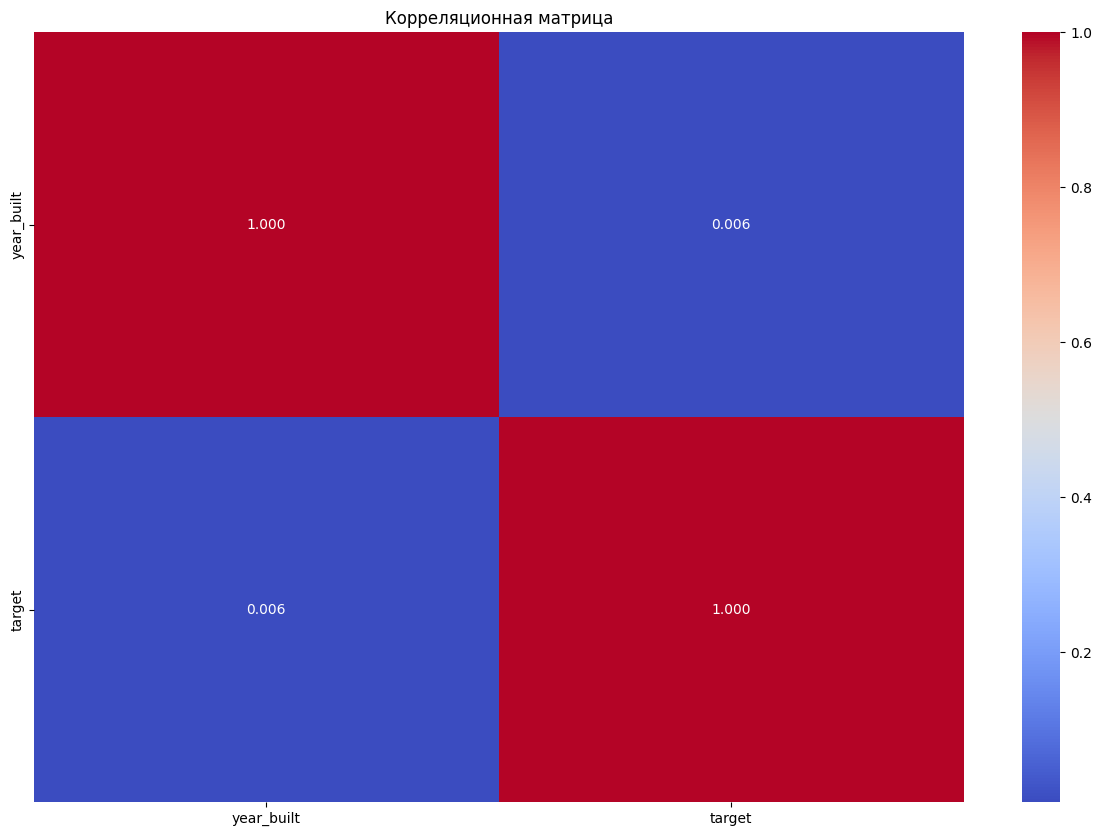

In [862]:

# 2 из 2: преобразование `year_built`

df_encoded = df[['year_built', 'target']]
correlation_matrix = df_encoded.corr()
target_correlation = correlation_matrix['target'].sort_values(ascending=True)
print("Корреляция с целевой переменной:\n", target_correlation)

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".3f", cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

# Признак year_built слабо коррелирует с целевым признаком, но возможно он может влиять на цену дома,
# поэтому заменим пропуски на медианное значение, а также добавим булевый признак `is_built_year_missing`,
# чтобы не потерять информацию о пропусках

df['is_year_built_missing'] = df['year_built'].isnull().astype(int)

median_year_built = df['year_built'].median()
df['year_built'] = df['year_built'].fillna(median_year_built)

In [863]:
# преобразование `heating`

display(df['heating'].value_counts().head(10))

# создадим новый признак `is_heating`, указывающий есть ли отопление в доме
df['is_heating'] = df['heating'].apply(lambda x: 0 if x is None or x == '' or x == 'No Data' else 1)

# создадим новый признак `is_heating_gas`, указывающий есть ли газовое отопление в доме
df['is_heating_gas'] = df['heating'].apply(lambda x: 1 if x == 'Gas' else 0)

# создадим новый признак `is_heating_electric`, указывающий есть ли электрическое отопление в доме
df['is_heating_electric'] = df['heating'].apply(lambda x: 1 if x is not None and 'Electric' in x else 0)

# создадим новый признак `is_heating_central`, указывающий является ли отопление в доме центральным
df['is_heating_central'] = df['heating'].apply(lambda x: 1 if x is not None and 'Central' in x else 0)

# удаляем признак `heating`
df.drop(columns=['heating'], inplace=True)

heating
                    104627
Forced Air           81919
Forced air           51012
Other                28904
Electric             10126
Gas                   9232
No Data               8416
Central Air           7814
Central Electric      7111
Central               6245
Name: count, dtype: int64

In [864]:
# преобразование `cooling`

display(df['cooling'].value_counts().head(10))

def convert_cooling(val):
    if val is None or val == '' or val == 'No Data':
        return 0
    return 1

# создадим новый признак `is_cooling`, указывающий есть ли охлаждение в доме
df['is_cooling'] = df['cooling'].apply(convert_cooling)

# удаляем признак `cooling`
df.drop(columns=['cooling'], inplace=True)

cooling
Central             157162
                    117997
Central Air          14378
No Data              10396
Has Cooling           9729
None                  7250
Central Electric      6154
Wall                  3968
Central Gas           3573
Central Heating       2807
Name: count, dtype: int64

In [865]:
# преобразование `parking`
display(df['parking'].value_counts().head(10))
print('Уникальных значений признака `parking`:', len(df['parking'].unique()))

def convert_parking(val):
    if (val is None
        or val == ''
        or val == 'None'
        or val == 'No Data'
        or val == '0'
        or val == 'On Street'
    ):
        return 0

    return 1

# преобразуем признак в бинарный: 1 - есть парковка, 0 - нет
df['parking'] = df['parking'].apply(convert_parking)



parking
                            169949
Attached Garage              70057
2 spaces                     27859
1 space                      14097
Detached Garage              13044
No Data                      13021
Carport                       7659
3 spaces                      4690
Off Street                    3507
Carport, Attached Garage      3005
Name: count, dtype: int64

Уникальных значений признака `parking`: 3311


In [866]:
# преобразование `lotsize`

def convert_lotsize(val):
    if pd.isna(val) or val in ['', 'None', 'No Data', '—', '-- sqft lot']:
        return None

    val = str(val).lower()
    number = ''

    # Извлечения числа
    for char in val:
        if char.isdigit() or char == '.':
            number += char
        elif char == 'a':
            # преобразование акров в квадратные футы
            # 1 акр = 43560 квадратных футов
            return int(float(number.replace(',', '')) * 43560)

    if not number:
        return None

    number = float(number.replace('..', ''))

    if number <= 1:
        # такие маленьки значения, скорее всего, тоже представлены в акрах
        return int(number * 43560)

    return int(number)


df['lotsize'] = df['lotsize'].apply(convert_lotsize)

print(f'Процент пропусков признака `lotsize`: {df[df.lotsize.isna()].shape[0] / df.shape[0] * 100:.2f}%')

# удаляем признак `lotsize`, поскольку он содержит большой процент пропусков - четверть данных
df.drop(columns=['lotsize'], inplace=True)


Процент пропусков признака `lotsize`: 25.34%


In [867]:
# 1 из 2: преобразование `city`

def convert_city(val):
    if pd.isna(val) or val in ['', 'None', 'No Data', '—', '--', ' ']:
        return None
    return str(val).lower()

df['city'] = df['city'].apply(convert_city)

total_missed = df[df.city.isna()].shape[0]
print(f'Процент пропусков признака `city`: {total_missed / df.shape[0] * 100:.2f}% ({total_missed})')

# преобразуем признак в категориальный
df['city'] = df['city'].astype('category')

print(f'Уникальных значений: {len(df.city.unique())}')


Процент пропусков признака `city`: 0.02% (62)
Уникальных значений: 1866


Можно, в принципе, удалить строки с пропущенными значениями в признаке "city", но вместо этого, возможно, лучше удалить сам
признак, поскольку это не что иное как "zipcode", но в текстовом виде.

Докажем сначала, что есть сильная связь между признаками "city" и "zipcode" с помощью коэффициента Крамера V.

In [868]:
# 2 из 2: преобразование `city`

# Создание контингентной таблицы
contingency_table = pd.crosstab(df['zipcode'], df['city'])

# Расчет хи-квадрат статистики
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)

# Вычисление коэффициента Крамера V
n = contingency_table.sum().sum()
phi2 = chi2 / n
r, k = contingency_table.shape
phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
rcorr = r - ((r-1)**2)/(n-1)
kcorr = k - ((k-1)**2)/(n-1)
cramer_v = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

print(f"Коэффициент Крамера V: {cramer_v}")


Коэффициент Крамера V: 0.8100087279238902


In [869]:
# Коэффициент Крамера V равный 0.81 указывает на очень сильную связь между двумя категориальными признаками "zipcode" и "city",
# поэтому удаляем признак "city"

df = df.drop('city', axis=1)

In [870]:
# преобразование `street`

total_unique = len(df['street'].unique())
print(f'Процент уникальных значений признака `street`: {total_unique / df.shape[0] * 100:.2f}% ({total_unique})')

# почти 90% уникальных значений - остаток либо дубликаты, либо отсутствие адреса - удаляем весь признак
display(df['street'].value_counts().head(10))

df = df.drop('street', axis=1)


Процент уникальных значений признака `street`: 89.31% (332602)


street
Address Not Disclosed    672
Undisclosed Address      516
(undisclosed Address)    391
Address Not Available    175
Unknown Address           72
2103 E State Hwy 21       57
11305 Gulf Fwy            54
17030 Youngblood Rd.      38
NE 58th Cir               34
9470 Lancaster Rd. SW     32
Name: count, dtype: int64

In [871]:
# Преобразованиe признака `schools`
# 1 of 2: исследование ключей в словаре `schools`

# Преобразование строкового JSON в структуру данных Python
print(df['schools'].value_counts().head(10))

# Признак содержит рейтинг школ, расстояния до них, названия и виды классов.
# Удалим записи, где данные о школал отсутствуют

indexes_to_drop = df[df['schools'] == "[{'rating': [], 'data': {'Distance': [], 'Grades': []}, 'name': []}]"].index
df = df.drop(indexes_to_drop)

indexes_to_drop = df[df['schools'] == "[{'rating': [''], 'data': {'Distance': [], 'Grades': []}, 'name': []}]"].index
df = df.drop(indexes_to_drop)

schools
[{'rating': [], 'data': {'Distance': [], 'Grades': []}, 'name': []}]                                                                                                                                                                           3433
[{'rating': ['4/10', '5/10', '6/10'], 'data': {'Distance': ['39.69mi', '39.69mi', '39.69mi'], 'Grades': ['9-12', '6-8', 'PK-5']}, 'name': ['Fort Hancock High School', 'Fort Hancock Middle School', 'Benito Martinez Elementary School']}]     222
[{'rating': ['4/10', '6/10', '3/10'], 'data': {'Distance': ['3.62mi', '3.62mi', '3.62mi'], 'Grades': ['6-8', 'PK-5', '9-12']}, 'name': ['Horizon Middle School', 'Desert Hills Elementary School', 'Horizon High School']}]                     168
[{'rating': ['5/10', '3/10', '5/10'], 'data': {'Distance': ['9.71mi', '8.92mi', '1.56mi'], 'Grades': ['5-8', '9-12', 'K-4']}, 'name': ['Cheatham Middle School', 'Cheatham Co Central', 'West Cheatham Elementary School']}]                    133
[{'rating': ['10

In [872]:
# преобразование `schools`
# 2 of 2: создание новых признаков из признака `schools`

# Функция для извлечения среднего рейтинга школ
def extract_average_rating(schools):
    all_ratings = []

    for school in schools:
        all_ratings.extend(school['rating'])

    # Удаление строк '/10'
    all_ratings = [r.split('/')[0] for r in all_ratings]

    # Замена 'None' на 'NR'
    all_ratings = [None if 'None' in r or 'NR' in r or 'NA' in r else r for r in all_ratings]

    # Замена 'NR' на среднее из оставшихся чисел
    try:
        all_rating = [np.nan if r is None else (np.nan if not r.isdigit() else float(r)) for r in all_ratings]

        if not all_ratings:
            print(all_ratings)
            print(schools)
            return None

        avg_rating = np.nanmean(all_rating)
    except RuntimeWarning as e:
        print(e)
        print(all_ratings)
        for item in all_ratings:
            print(f' == value: {item}, type: {type(item)}')
        return None

    return avg_rating

# Функция для извлечения среднего расстояния до школ
def extract_average_distance(schools):
    all_distances = []
    for school in schools:
        all_distances.extend(school['data']['Distance'])
    # Удаление "mi" из строк и преобразование в числа
    all_distances = [float(d.replace('mi', '').strip()) for d in all_distances if 'mi' in d]
    # Проверка, что остались значения
    all_distances = [item for item in all_distances if item is not None]
    if all_distances:
        return np.mean(all_distances).round(2)
    else:
        return None

# Функция для подсчета числа школ в районе
def count_schools(schools):
    total_schools = 0
    for school_list in schools:
        total_schools += len(school_list['rating'])
    return total_schools

# Функция для проверки наличия частных школ
def has_private_school(schools):
    private_keywords = ['Private', 'Academy', 'Institute']
    for school in schools:
        for name in school['name']:
            if any(keyword in name for keyword in private_keywords):
                return 1
    return 0

df['schools_dict'] = df['schools'].apply(eval)

# Создание новых признаков
df['average_school_rating'] = df['schools_dict'].apply(extract_average_rating)
df['average_school_distance'] = df['schools_dict'].apply(extract_average_distance)
df['num_schools'] = df['schools_dict'].apply(count_schools)
df['has_private_school'] = df['schools_dict'].apply(has_private_school)

# Удаление schools_dict и schools
df.drop(columns=['schools', 'schools_dict'], inplace=True)
df.reset_index(drop=True, inplace=True)


/var/folders/nc/ybcdybgx0tl4kk5tp22yfjs00000gq/T/ipykernel_45744/1704715856.py:26: RuntimeWarning: Mean of empty slice
  avg_rating = np.nanmean(all_rating)


In [873]:
df['is_average_school_rating_missing'] = df['average_school_rating'].isnull().astype(int)

median_year_built = df['average_school_rating'].median()
df['average_school_rating'] = df['average_school_rating'].fillna(median_year_built)

In [874]:
# удалим полные дубликаты
print('Количество дубликатов: {}'.format(df[df.duplicated()].shape[0]))

# Удаляем дубликаты если необходимо:
if df[df.duplicated()].shape[0] == 0:
    print('Дубликатов не обраружено. Размеры таблицы не меняется: {}'.format(df.shape))
else:
    data = df.drop_duplicates()
    print('Размер таблицы после удаления дубликатов: {}'.format(data.shape))

Количество дубликатов: 4297
Размер таблицы после удаления дубликатов: (364593, 24)


In [875]:
removed = original_df.shape[0] - df.shape[0]
removed_perc = removed * 100 / original_df.shape[0]
print(f'Всего удалено записей: {removed} ({removed_perc:.3f}%)')

Всего удалено записей: 8295 (2.199%)


Корреляция с целевой переменной (по убыванию модуля):
 target                              1.000000
average_school_rating               0.161779
PrivatePool                         0.109184
beds                                0.102673
fireplace                           0.053087
baths                               0.023910
is_remodeled                        0.011135
year_built                          0.006358
parking                             0.005928
average_school_distance             0.003424
is_cooling                          0.001691
sqft                               -0.000183
is_heating_central                 -0.000201
is_average_school_rating_missing   -0.004577
is_year_built_missing              -0.009345
is_heating_gas                     -0.011078
num_schools                        -0.019950
has_private_school                 -0.023248
is_heating_electric                -0.028296
zipcode                            -0.033753
is_heating                         -0.036517


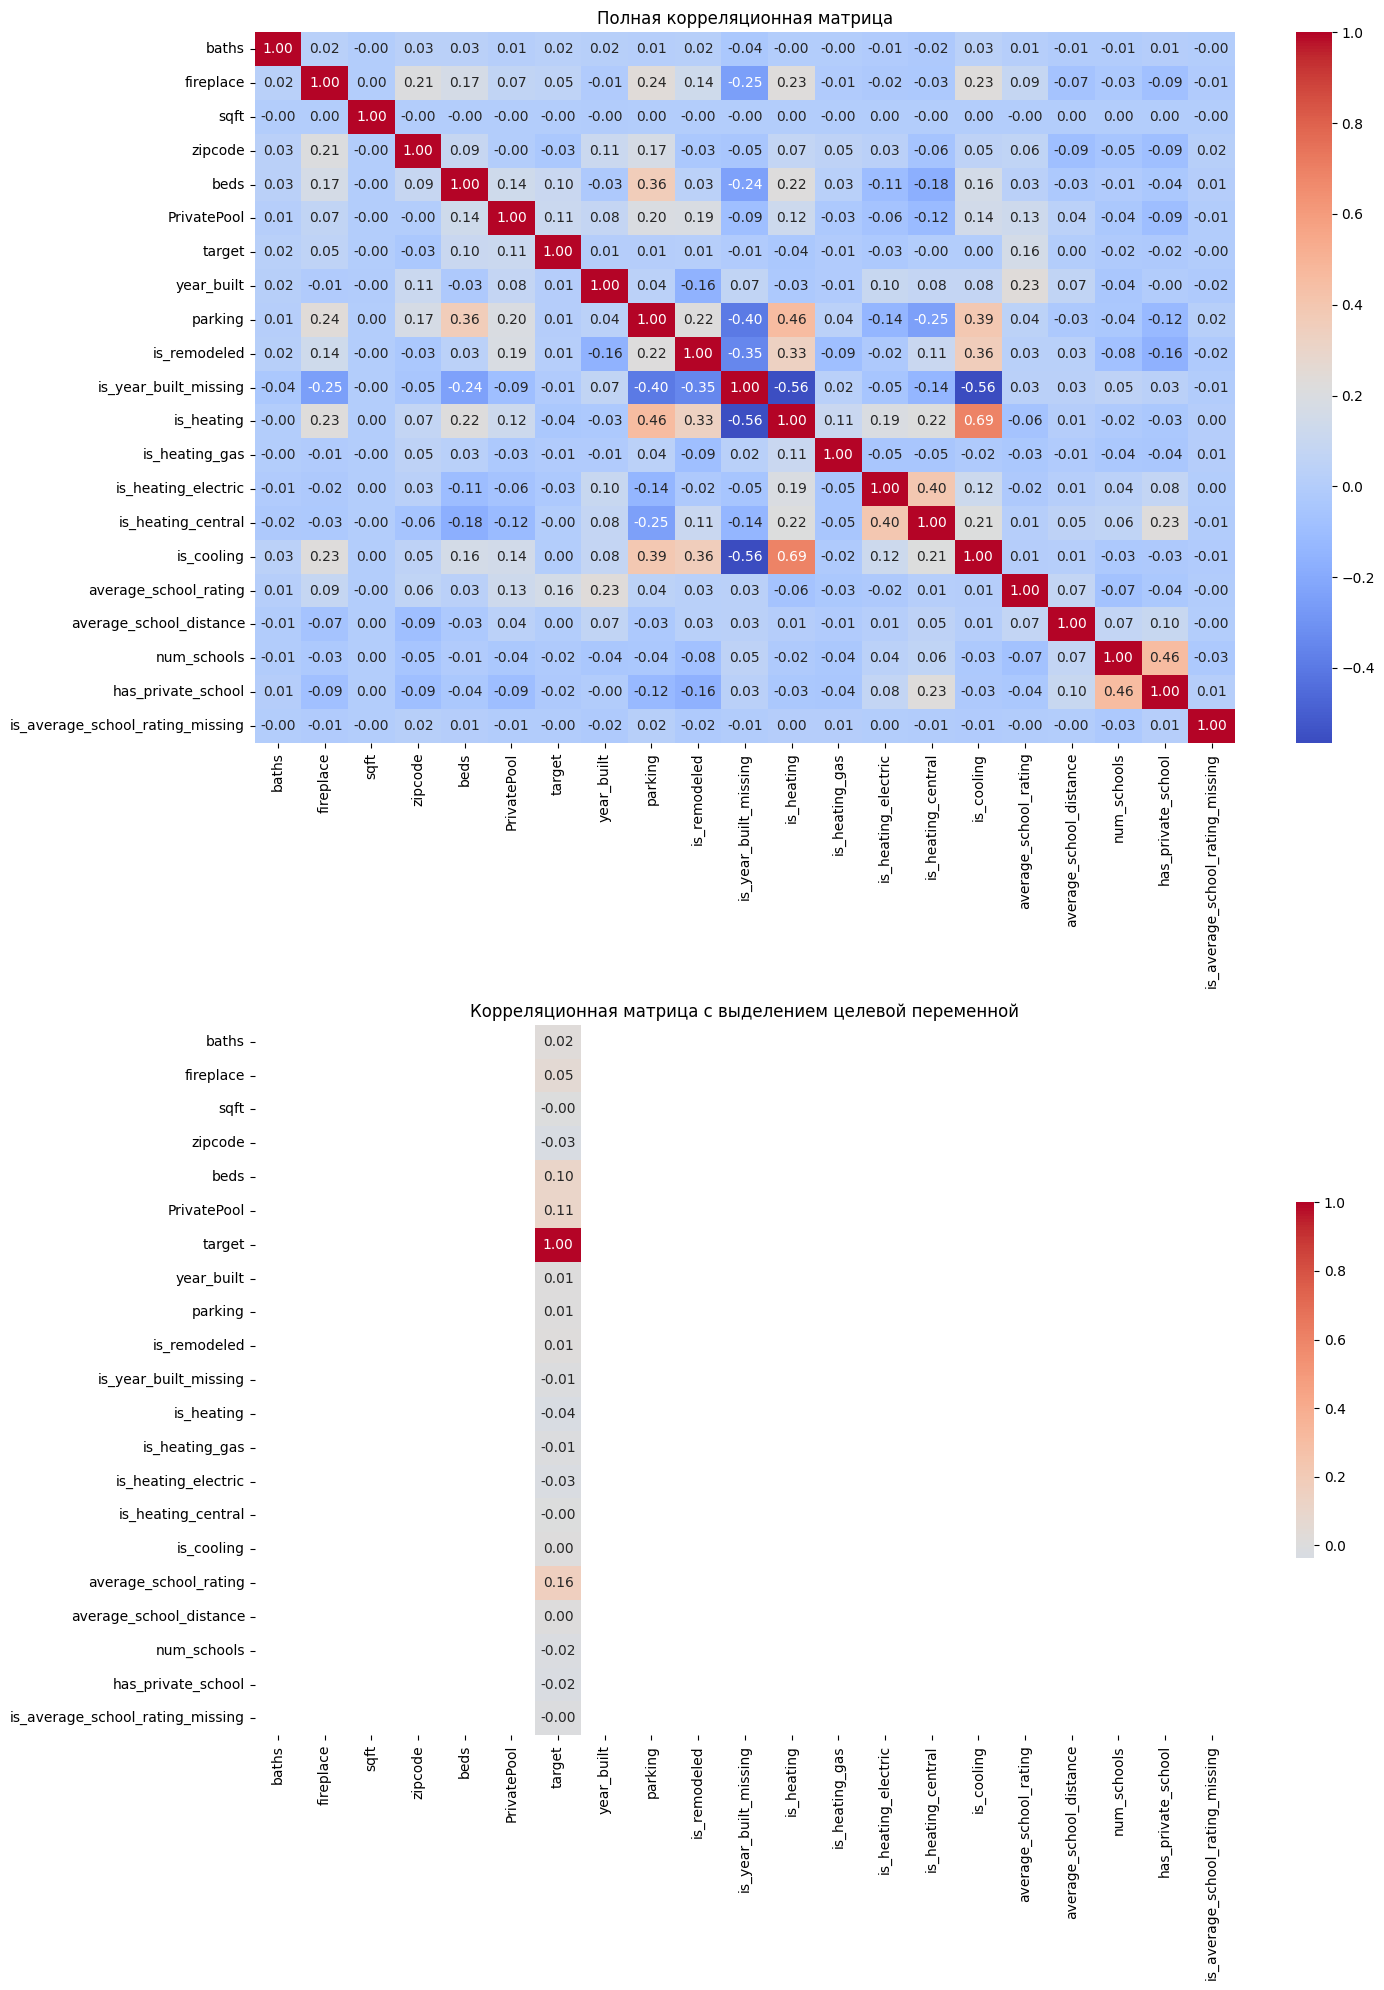

In [876]:
df_encoded = df.drop(columns=['status', 'propertyType', 'state'])
correlation_matrix = df_encoded.corr()

target_correlation = correlation_matrix['target'].sort_values(ascending=False)
sorted_target_correlation = correlation_matrix['target'].reindex(target_correlation.index)
print("Корреляция с целевой переменной (по убыванию модуля):\n", sorted_target_correlation)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 20))

# Первая heatmap - полная корреляционная матрица
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', ax=ax1)
ax1.set_title('Полная корреляционная матрица')

# Вторая heatmap - с маской для выделения целевой переменной
mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[:, correlation_matrix.columns != 'target'] = True
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=mask, center=0, cbar_kws={"shrink": .5}, ax=ax2)
ax2.set_title('Корреляционная матрица с выделением целевой переменной')

plt.tight_layout()
plt.show()

In [877]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368890 entries, 0 to 368889
Data columns (total 24 columns):
 #   Column                            Non-Null Count   Dtype   
---  ------                            --------------   -----   
 0   status                            368890 non-null  category
 1   propertyType                      368890 non-null  category
 2   baths                             368890 non-null  int64   
 3   fireplace                         368890 non-null  int64   
 4   sqft                              368890 non-null  int64   
 5   zipcode                           368890 non-null  category
 6   beds                              368890 non-null  int64   
 7   state                             368890 non-null  category
 8   PrivatePool                       368890 non-null  int64   
 9   target                            368890 non-null  int64   
 10  year_built                        368890 non-null  float64 
 11  parking                           36889

In [878]:
df.to_csv('data/data1.csv', index=False)

### Выводы
* создали несколько новых признаков из составных столбцов `schools` и `homeFacts`
* следующие признаки были выбраны как категориальные: `status`, `propertyType`, `zipcode`, `state`
* после преобразований удалили 4297 полных дубликатов
* всего удалили 8295 записей (~2.2%)
* признак `stories` был удален из-за большого количества пропусков (39.91%)
* все признаки слабо коррелируют с целевой переменной
* мультиколлинеарности не обнаружено
